In [2]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Greenstone.


In [3]:
# Importing gempy
import gempy as gp

# Aux imports
import numpy as np
import matplotlib.pyplot as plt
import os

print(gp.__version__)

No module named 'osgeo'
2.2.8


In [4]:
geo_model = gp.create_model('Greenstone')

In [5]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

# Importing the data from csv files and settign extent and resolution
geo_model = gp.init_data(geo_model, [696000, 747000, 6863000, 6930000, -20000, 200], [50, 50, 50],
                         path_o=data_path + "/data/input_data/tut_SandStone/SandStone_Foliations.csv",
                         path_i=data_path + "/data/input_data/tut_SandStone/SandStone_Points.csv")

Active grids: ['regular']


/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


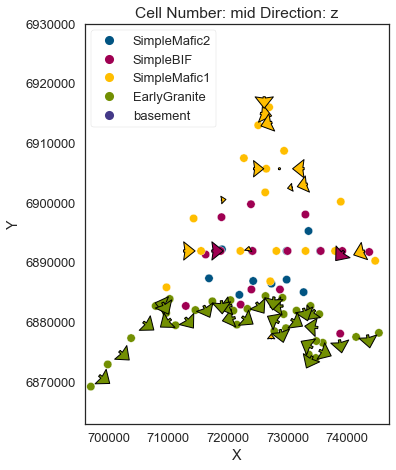

In [6]:
gp.plot_2d(geo_model, direction=['z'])

In [7]:
gp.map_stack_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite',
                                     "BIF_Series": ('SimpleMafic2', 'SimpleBIF'),
                                     "SimpleMafic_Series": 'SimpleMafic1', 'Basement': 'basement'})

,surface,series,order_surfaces,color,id
3,EarlyGranite,EarlyGranite_Series,1,#728f02,1
0,SimpleMafic2,BIF_Series,1,#015482,2
1,SimpleBIF,BIF_Series,2,#9f0052,3
2,SimpleMafic1,SimpleMafic_Series,1,#ffbe00,4
4,basement,Basement,1,#443988,5


In [8]:
geo_model.add_surface_values([10, 3, 7, 1, 5])

,surface,series,order_surfaces,color,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,#728f02,1,10
0,SimpleMafic2,BIF_Series,1,#015482,2,3
1,SimpleBIF,BIF_Series,2,#9f0052,3,7
2,SimpleMafic1,SimpleMafic_Series,1,#ffbe00,4,1
4,basement,Basement,1,#443988,5,5


In [16]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...


/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 86591.2
$C_o$             1.78525e+08
drift equations  [3, 3, 3, 3]


/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan_perform

In [17]:
gp.compute_model(geo_model, set_solutions=True)

weights foo __str__ = [-2.07057708e-05  9.93648486e-05  3.95613009e-04 -1.51641317e-04
 -5.38334744e-04 -2.74921863e-04 -6.49827463e-06 -1.78582418e-05
  2.35912711e-04  3.39662035e-04 -7.13514961e-04 -3.78408696e-04
 -7.31076617e-05  9.27294864e-05  5.32721623e-04 -5.14147223e-04
 -2.84232783e-04 -1.23277962e-04  1.20409475e-04 -1.51995734e-05
 -3.34114870e-04 -5.59662662e-04  3.17854670e-04  6.40272606e-05
  1.14945958e-05 -7.38712035e-06  3.00789302e-05 -1.34742965e-04
 -4.95409034e-04 -4.06539514e-04  1.28429551e-04  6.51415841e-05
 -1.00316482e-04 -2.63062260e-04 -4.23496415e-04 -6.77653728e-04
  1.07696988e-04 -6.57874489e-05 -7.37619501e-05 -9.16225582e-05
 -5.27118255e-04 -5.16642523e-05 -2.00693265e-04 -1.62326094e-04
 -6.69963422e-05 -3.05534926e-04 -2.15143849e-04 -4.68925140e-05
 -6.65355366e-04 -6.76442328e-05  1.15610983e-05 -7.67814645e-06
  1.57997958e-07  4.83330667e-07  1.90687741e-06  1.31609859e-06
 -8.32982862e-06  2.27773130e-07  9.91025646e-07 -1.37121741e-06
 -1


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

In [24]:
geo_model.interpolator.non_zero

AttributeError: non_zero

/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


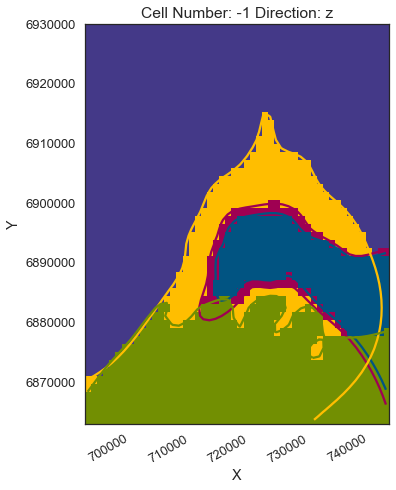

In [11]:
gp.plot_2d(geo_model, cell_number=[-1], direction=['z'], show_data=False)

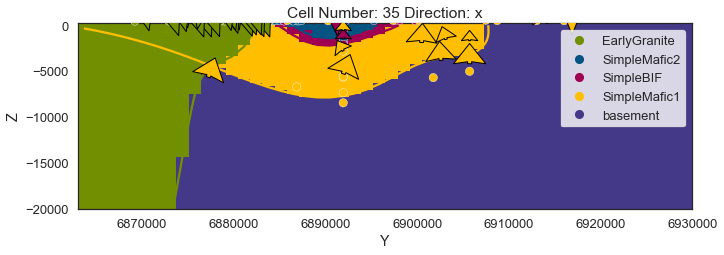

In [12]:
gp.plot_2d(geo_model, cell_number=[35], direction='x')

In [1]:
plt.plot(geo_model.solutions.scalar_field_matrix[-2500:])

NameError: name 'plt' is not defined

In [ ]:
geo_model.solutions.scalar_field_at_surface_points

array([[0.05677412, 0.        , 0.        , 0.        ],
       [0.        , 0.71998535, 0.71403963, 0.        ],
       [0.        , 0.        , 0.        , 0.55517816]])

In [ ]:
geo_model.solutions.values_matrix

array([[2.61, 2.61, 2.61, ..., 2.61, 2.61, 2.61]])

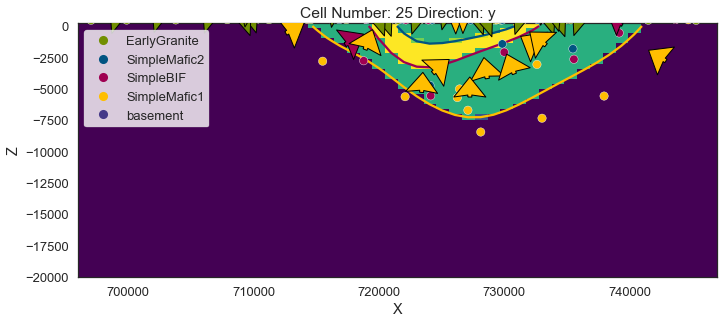

In [ ]:
p2d = gp.plot_2d(geo_model, cell_number=[25], block=geo_model.solutions.values_matrix,
           direction=['y'], show_data=True,
           kwargs_regular_grid={'cmap': 'viridis', 'norm':None})

sphinx_gallery_thumbnail_number = 5



In [ ]:
gp.plot_3d(geo_model)

In [ ]:
np.save('greenstone_ver', geo_model.solutions.vertices)
np.save('greenstone_edges', geo_model.solutions.edges)

/Users/zhouji/anaconda3/envs/gempy/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## Saving the model




gp.save_model(geo_model, path=os.pardir + '/data/gempy_models')



In [ ]:
gp.save_model(geo_model)

True

In [13]:
geo_model.additional_data

values
Structure isLith                                                          True
          isFault                                                        False
          number faults                                                      0
          number surfaces                                                    4
          number series                                                      4
          number surfaces per series                              [1, 2, 1, 0]
          len surfaces surface_points                         [27, 11, 15, 17]
          len series surface_points                            [27, 26, 17, 0]
          len series orientations                               [26, 2, 13, 0]
Options   dtype                                                        float64
          output                                                       geology
          theano_optimizer                                        fast_compile
          device                                                           cpu
          verbosity                                                         []
Kriging   range                                                        86591.2
          $C_o$                                                    1.78525e+08
          drift equations                                         [3, 3, 3, 3]
Rescaling rescaling factor                                               97123
          centers                      [721180.0625, 6893494.75, -3951.360221]